In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.metrics import precision_recall_fscore_support


In [2]:
df= pd.read_csv('titanic.csv')

In [3]:
df.sample(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.2750,NaN,S
692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S
723,724,0,2,"Hodges, Mr. Henry Price",male,50.0,0,0,250643,13.0000,NaN,S
189,190,0,3,"Turcin, Mr. Stjepan",male,36.0,0,0,349247,7.8958,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#since there is only two empty in embarked we will remove it
df.dropna(subset=['Embarked'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
#since Cabin contain very large number of null value we will remvoe this column
df = df.drop(columns=['PassengerId','Name','Ticket'])

In [8]:
df.sample(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
119,0,3,female,2.0,4,2,31.275,NaN,S
341,1,1,female,24.0,3,2,263.000,C23 C25 C27,S


# Performing EDA

In [9]:
cat_columns=['Pclass','Sex','Embarked','Survived']

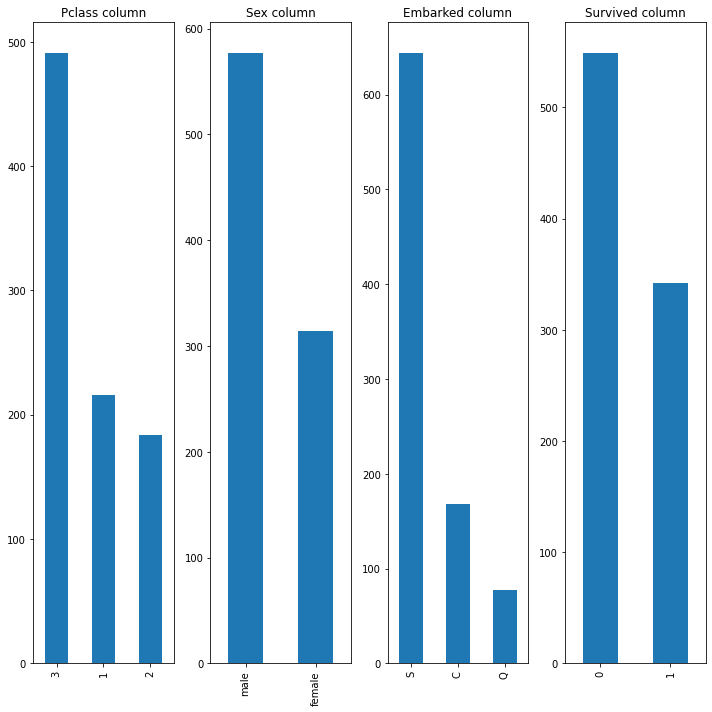

In [10]:
fig , axes = plt.subplots(1,4,figsize=(10,10))
for i , column in enumerate(cat_columns):
    df[column].value_counts().plot(kind='bar',ax=axes[i],title=f'{column} column')
plt.tight_layout()
plt.show()


<AxesSubplot:xlabel='Age', ylabel='Sex'>

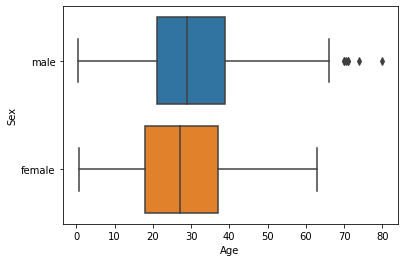

In [11]:
#checking outlier in the numeric column
num_column=['Age','Fare']
sns.boxplot(data=df,x='Age',y='Sex')

<AxesSubplot:xlabel='Fare'>

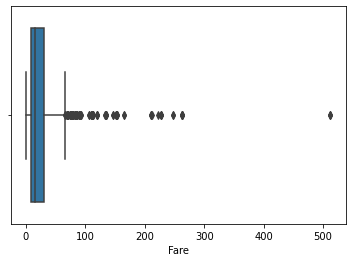

In [12]:
sns.boxplot(data=df,x='Fare')

<AxesSubplot:ylabel='Frequency'>

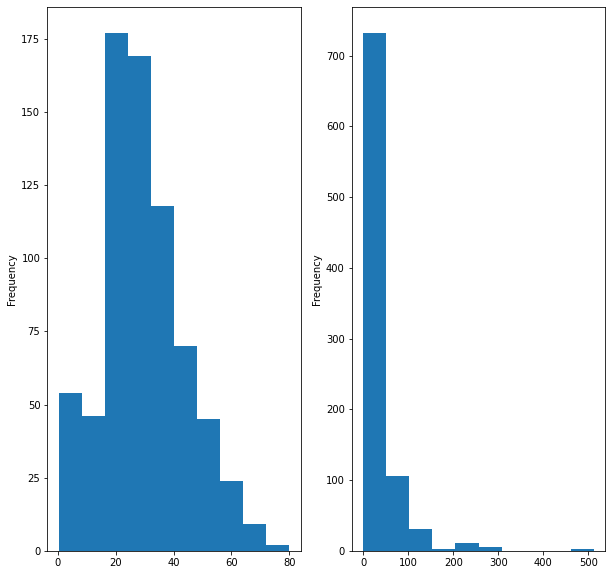

In [13]:
#checking the distribution of numeric data
fig,axes = plt.subplots(1,2,figsize=(10,10))
df['Age'].plot(kind='hist',ax=axes[0])
df['Fare'].plot(kind='hist',ax=axes[1])

# Performing the data preprocessing

In [14]:
#Removing the null variable 
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [15]:
#Since cabin column contain more than 50 percent null value so we will remove it
df.drop('Cabin',inplace=True,axis=1)

In [16]:
#Intially we will train model by removing the null values and observe the accuracy
df2 = df.dropna()

In [17]:
df2.isna().sum()


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [18]:
#handling the outlier of Age column
percentile_25= df2['Fare'].quantile(0.25)
percentile_75= df2['Fare'].quantile(0.75)
iqr=percentile_75-percentile_25
print(percentile_25)
print(percentile_75)

8.05
33.0


In [19]:
upper_limit=percentile_75+ iqr*1.5
lower_limit=percentile_25-iqr*1.5
print(upper_limit)
print(lower_limit)

70.425
-29.374999999999996


In [20]:
df2.shape

(712, 8)

In [21]:
df2['Age']= np.where(
    df2['Age']>upper_limit,
    upper_limit,
    df2['Age']
)

C:\Users\SHIVAG~1\AppData\Local\Temp/ipykernel_2492/3278119705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Age']= np.where(


In [22]:
#checking the correaltion of categorical column with target column
for i in ['Pclass','Sex','Embarked']:
    chi2,p_value,_,_=chi2_contingency(pd.crosstab(df[i],df['Survived']))
    print(i,'---',p_value)

Pclass --- 4.549251711298793e-23
Sex --- 1.1973570627755645e-58
Embarked --- 1.769922284120912e-06


In [23]:
df2.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
71,0,3,female,16.0,5,2,46.9000,S
293,0,3,female,24.0,0,0,8.8500,S
54,0,1,male,65.0,0,1,61.9792,C
743,0,3,male,24.0,1,0,16.1000,S
625,0,1,male,61.0,0,0,32.3208,S


In [50]:
from sklearn.compose import ColumnTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,make_scorer


In [25]:
y=df2['Survived']
X=df2.drop('Survived',axis=1)

In [26]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
X_train.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
472,2,female,33.0,1,2,27.75,S
432,2,female,42.0,1,0,26.00,S


In [28]:
trans1 = ColumnTransformer(
    transformers=[
        ('Sex_Embarked',OneHotEncoder(drop='first'),[1,6])
    ],
    remainder='passthrough'
)

In [29]:
trans2 = ColumnTransformer(
    transformers=[
        ('Age_Fare_scale',StandardScaler(),[2,5])
    ],
    remainder='passthrough'
)

In [30]:
trans3 = LogisticRegression()


In [31]:
pipe = Pipeline(
    [
        ('trans1',trans1),
        ('trans2',trans2),
        ('trans3',trans3)
    ]
)

In [32]:
pipe.fit(X_train,y_train)

c:\users\shiva gaire\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('trans1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Sex_Embarked',
                                                  OneHotEncoder(drop='first'),
                                                  [1, 6])])),
                ('trans2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Age_Fare_scale',
                                                  StandardScaler(), [2, 5])])),
                ('trans3', LogisticRegression())])

In [33]:
y_pred= pipe.predict(X_test)

In [34]:
accuracy= accuracy_score(y_test,y_pred)
print(accuracy)

0.8111888111888111


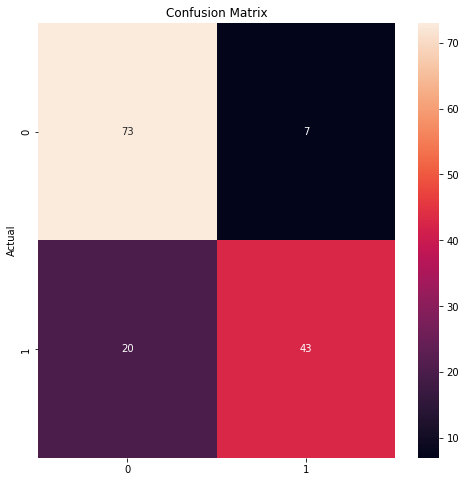

In [35]:
matrix=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(matrix, annot=True)
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [36]:
#finding all types of evaluation metircs
accuracy=accuracy_score(y_test,y_pred)
print(f'accuracy={accuracy}')
print()
precison,recall,fscore,_=precision_recall_fscore_support(y_test,y_pred)
for i, v in enumerate(['0','1']):
    print(f'Class {v}')
    print(f'Precision:{precison[i]}')
    print(f'recall:{recall[i]}')
    print(f'f1_score:{fscore[i]}')
    print()

accuracy=0.8111888111888111

Class 0
Precision:0.7849462365591398
recall:0.9125
f1_score:0.8439306358381503

Class 1
Precision:0.86
recall:0.6825396825396826
f1_score:0.7610619469026547



# Performing Hyperparameter Tunning

In [51]:
hyperparameters = {
    "trans3__penalty": ['l1', 'l2'],
    "trans3__solver": ['liblinear'],
    "trans3__max_iter": [50, 100, 200],
}

In [ ]:
f1_scorer = make_scorer(f1_score)
grid_search  = GridSearchCV(estimator=pipe, param_grid=hyperparameter, cv=3, scoring=f1_scorer)


In [49]:
# Create GridSearchCV object
grid_search = GridSearchCV(pipe, hyperparameters, cv=5, n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)  # Replace X_train, y_train with your training data


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trans1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('Sex_Embarked',
                                                                         OneHotEncoder(drop='first'),
                                                                         [1,
                                                                          6])])),
                                       ('trans2',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('Age_Fare_scale',
                                                                         StandardScaler(),
                                                                         [2,
                                                                          5])])),
                                       ('trans3', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'trans3__max_iter': [50, 100, 200],
                         'trans3__penalty': ['l1', 'l2'],
                         'trans3__solver': ['liblinear']})

In [46]:
grid_search.best_params_

{'trans3__class_weight': None,
 'trans3__max_iter': 100,
 'trans3__penalty': 'l1',
 'trans3__solver': 'liblinear'}

In [47]:
grid_search.best_score_

0.7979195777053252

In [ ]:
logReg.set_params(**grid_search.best_params_)
logReg.fit(X_train, y_train)